# Validation of Different Model
![WorkFlow](./Val.jpg) 

## Step 1 import shapefile and Plot
In this step, we load shapefiles and visualize the results of different spatial analyses (MGWR, OLS, Space-Time Cube, and Suitability Analysis) using Python's `geopandas` and `matplotlib` libraries.

### Step 1.1  **Import Required Libraries**:
   - We use `geopandas` to handle spatial data in the form of shapefiles.
   - `matplotlib` is utilized to create the plots and visualize the spatial data.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Step 1.2 **Load Shapefiles**:
Four shapefiles are loaded, each representing the results from different spatial models:
  - **MGWR** results: Multiscale Geographically Weighted Regression analysis, which shows how convenience store density varies across space.
  - **OLS** results: Ordinary Least Squares regression for estimating and predicting convenience store locations.
  - **Space-Time Cube** results: Represents the predicted spatial and temporal distribution of convenience stores.
  - **Suitability Analysis** results: Shows the areas deemed most suitable for store placement based on spatial criteria.

In [6]:
# Read the shapefile
shapefile1_path = 'Results/MGWR/MGWR.shp'
shapefile2_path = 'Results/OLS/OLS.shp'
shapefile3_path = 'Results/SpaceTimeCube/SpaceTimeCube.shp'
shapefile4_path = 'Results/Suitability/Suitability.shp'
# Read the shapefile
gdf1 = gpd.read_file(shapefile1_path)
gdf2 = gpd.read_file(shapefile2_path)
gdf3 = gpd.read_file(shapefile3_path)
gdf4 = gpd.read_file(shapefile4_path)

In [7]:
#Print gdf head
print(gdf1.head())
print(gdf2.head())
print(gdf3.head())
print(gdf4.head())

   SOURCE_ID  S_CONVENIE    S_BUSC  S_METROC   S_BIKEC   S_ROADC  S_POPDENC  \
0          1   -0.480210  0.461398  0.367606  0.441868  1.521353   1.754126   
1          2    2.152653  1.603125  2.176768  2.390381  1.521353   1.754126   
2          3   -0.480210 -0.109465  0.367606 -0.532388 -0.144764   0.525917   
3          4   -0.480210 -0.109465 -0.838502 -0.532388 -0.144764  -0.702292   
4          5   -0.480210 -0.680328 -0.838502 -0.532388 -0.700136  -0.702292   

   S_C_INTRCP  S_SE_INTRC  S_T_INTRCP  ...   C_ROADC  C_POPDENC  S_RESIDUAL  \
0   -0.216253    0.093484   -2.313255  ...  0.036966   0.014199   -1.159479   
1   -0.047147    0.070575   -0.668046  ...  0.050496   0.014240    0.676910   
2   -0.138345    0.072785   -1.900727  ...  0.048746   0.014227   -0.241698   
3   -0.167584    0.090756   -1.846545  ...  0.015977   0.014226   -0.041141   
4   -0.173661    0.084100   -2.064944  ...  0.016313   0.014222    0.000785   

   S_STDRESID  INFLUENCE       COOKS_D  CND_NUMBER

### Step 1.3 **Create Subplots**:
- A 2x2 grid is created using `matplotlib` to visualize the four analyses.
- Relevant shapefile columns are plotted with a legend explaining the colors.
- Each subplot is titled based on the analysis:
   - MGWR – Store Density
   - OLS – Estimated Values
   - Space-Time Cube – Prediction Score
   - Suitability – Score


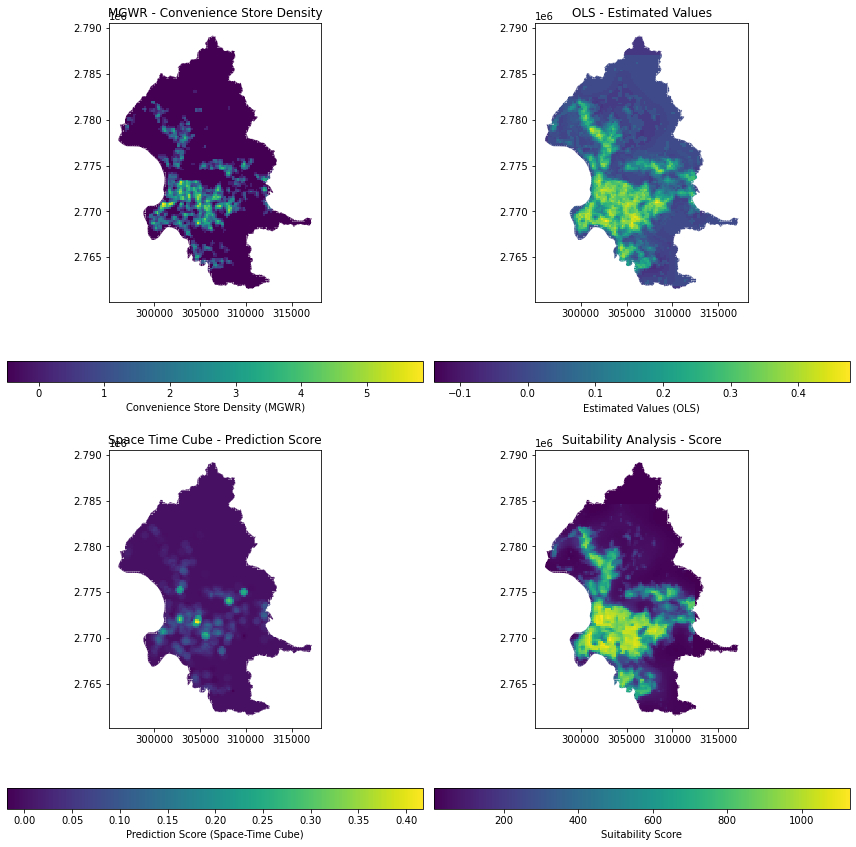

In [9]:
# Create a figure with subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each shapefile on a separate subplot with appropriate columns
gdf1.plot(ax=axs[0, 0], column='S_CONVENIE', legend=True, 
          legend_kwds={'label': "Convenience Store Density (MGWR)", 'orientation': "horizontal"})
gdf2.plot(ax=axs[0, 1], column='Estimated', legend=True, 
          legend_kwds={'label': "Estimated Values (OLS)", 'orientation': "horizontal"})
gdf3.plot(ax=axs[1, 0], column='Score', legend=True, 
          legend_kwds={'label': "Prediction Score (Space-Time Cube)", 'orientation': "horizontal"})
gdf4.plot(ax=axs[1, 1], column='score', legend=True, 
          legend_kwds={'label': "Suitability Score", 'orientation': "horizontal"})

# Set titles for each subplot
axs[0, 0].set_title('MGWR - Convenience Store Density')
axs[0, 1].set_title('OLS - Estimated Values')
axs[1, 0].set_title('Space Time Cube - Prediction Score')
axs[1, 1].set_title('Suitability Analysis - Score')

# Show the plots
plt.tight_layout()
plt.show()

## Step 2: Min-Max Normalization

To standardize the data and bring it to a comparable scale, we apply **Min-Max normalization** to each dataset. This ensures that all variables are scaled between 0 and 1, making them easier to compare in the visualizations. Below are the steps taken to normalize the data:

Using `MinMaxScaler` from `sklearn.preprocessing`, we apply the Min-Max scaling to the relevant columns from each dataset:
- For **MGWR**, we normalize the `S_CONVENIE` column.
- For **OLS**, we normalize the `Estimated` column.
- For **Space-Time Cube**, we normalize the `Score` column.
- For **Suitability Analysis**, we normalize the `score` column.

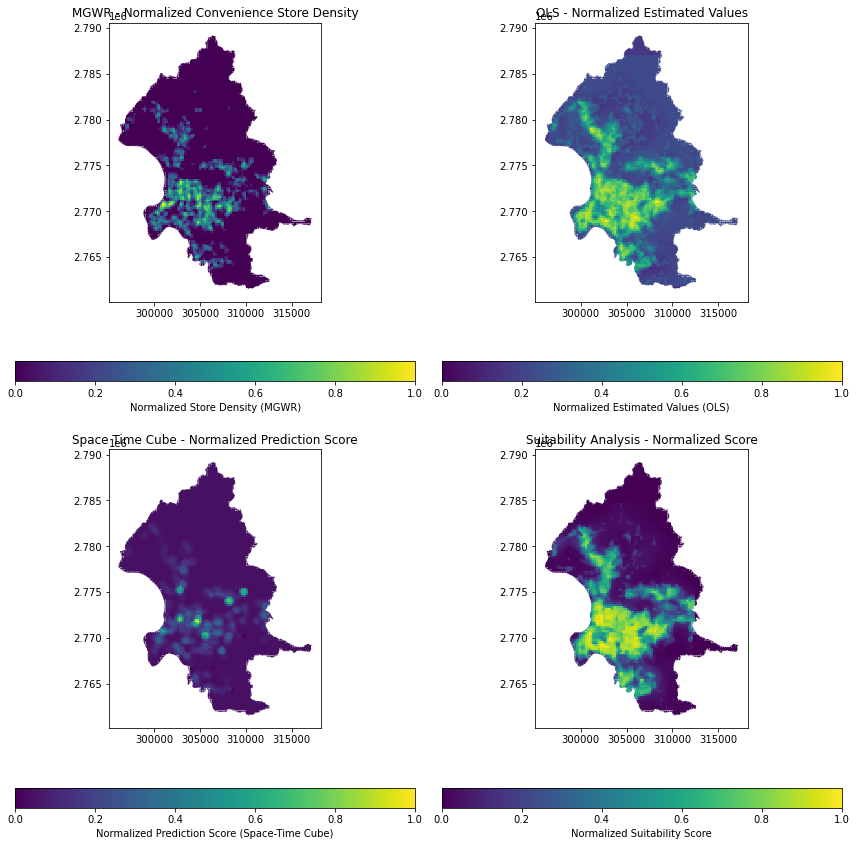

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the relevant columns using Min-Max scaling
gdf1['S_CONVENIE_norm'] = scaler.fit_transform(gdf1[['S_CONVENIE']])
gdf2['Estimated_norm'] = scaler.fit_transform(gdf2[['Estimated']])
gdf3['Score_norm'] = scaler.fit_transform(gdf3[['Score']])
gdf4['score_norm'] = scaler.fit_transform(gdf4[['score']])

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each shapefile with normalized values
gdf1.plot(ax=axs[0, 0], column='S_CONVENIE_norm', legend=True, 
          legend_kwds={'label': "Normalized Store Density (MGWR)", 'orientation': "horizontal"})
gdf2.plot(ax=axs[0, 1], column='Estimated_norm', legend=True, 
          legend_kwds={'label': "Normalized Estimated Values (OLS)", 'orientation': "horizontal"})
gdf3.plot(ax=axs[1, 0], column='Score_norm', legend=True, 
          legend_kwds={'label': "Normalized Prediction Score (Space-Time Cube)", 'orientation': "horizontal"})
gdf4.plot(ax=axs[1, 1], column='score_norm', legend=True, 
          legend_kwds={'label': "Normalized Suitability Score", 'orientation': "horizontal"})

# Set titles for each subplot
axs[0, 0].set_title('MGWR - Normalized Convenience Store Density')
axs[0, 1].set_title('OLS - Normalized Estimated Values')
axs[1, 0].set_title('Space Time Cube - Normalized Prediction Score')
axs[1, 1].set_title('Suitability Analysis - Normalized Score')

# Show the plots
plt.tight_layout()
plt.show()